# 対話状態として1つになった音声を作成します

In [47]:
from pathlib import Path

# 台本を指定
# dialogue_info_txt = "../dataset/out_LINE_woITAKO/dialogue_info.txt"
dialogue_info_txt = "../dataset/out_LINE_woITAKO_before_emotion/dialogue_info.txt"
# 音声を指定
Teacher_voice_base = Path("recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_2_sr22050_LINE_wContextwProsody_13/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval")
Mstudent_voice_base = Path("../dataset/out_LINE_MStudent/LINE_MStudent/wav")
Fstudent_voice_base = Path("../dataset/out_LINE_FStudent/LINE_FStudent/wav")

# 出力したいダイアログ名を指定
output_dialogue_names = ["LD12-Dialogue-07", "LD11-Dialogue-05", "LD14-Dialogue-08", "LD13-Dialogue-03"]

# 出力先
output_base = Path("dialogue_output_LINE_wContextwProsody_13_fastspeech2wGMMwContextswProsody+1つ前emotion+当該prosody")

output_base.mkdir(parents=True, exist_ok=True)

# 間に挟む無音時間(s)
silence = 0.2

# sampling rate
sampling_rate = 22050

## 実行

In [48]:
import numpy as np
import librosa
from scipy.io import wavfile

with open(dialogue_info_txt, 'r') as f:
    dialogue_info = f.readlines()

def get_dialogue(dialogue_info, dialogue_name):
    output = []
    for dialogue_txt in dialogue_info:
        if dialogue_name in dialogue_txt:
            output.append(dialogue_txt.strip())
    return output
    
for output_dialogue_name in output_dialogue_names:
    dialogues = get_dialogue(dialogue_info, output_dialogue_name)
    output_wav = []
    for txt in dialogues:
        name = txt.split(":")[0]
        spk = name.split("_")[0]
        if spk == "PAD":
            continue
        elif spk == "Teacher":
            wav_path = Teacher_voice_base / (name + ".wav")
        elif spk == "MStudent":
            wav_path = Mstudent_voice_base / (name + ".wav")
        elif spk == "FStudent":
            wav_path = Fstudent_voice_base / (name + ".wav")  
        _sr, x = wavfile.read(wav_path)
        if x.dtype in [np.int16, np.int32]:
            x = (x / np.iinfo(x.dtype).max).astype(np.float64)
        wav = librosa.resample(x, _sr, sampling_rate)
        output_wav += list(wav)
        output_wav += [0.0] * int(sampling_rate * silence)

    output_path = output_base / (output_dialogue_name + '.wav')
    output_wav = (np.array(output_wav) * np.iinfo(np.int16).max).astype(np.int16)
    wavfile.write(output_path, sampling_rate, output_wav)

/tmp/ipykernel_155291/3943474037.py:29: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _sr, x = wavfile.read(wav_path)
/tmp/ipykernel_155291/3943474037.py:29: WavFileWarning: Chunk (non-data) not understood, skipping it.
  _sr, x = wavfile.read(wav_path)


### (メモ)おすすめdialogueリスト

すべて, eval内から選出

LD12-Dialogue-07: Angry
```
PAD_LD12-Dialogue-07-PAD-Turn-00_PAD:118:0:生徒が部活動の顧問に怒られて不機嫌そうにしているので、講師が生徒に話を聞いてみる
Teacher_LD12-Dialogue-07-Teacher-Turn-01_Normal:118:1:こんにちは！
MStudent_LD12-Dialogue-07-MStudent-Turn-01_Angry:118:2:先生、聞いてくださいよ！俺、納得いかないことがあるんです！
Teacher_LD12-Dialogue-07-Teacher-Turn-02_Normal:118:3:どうしたの？そんな不機嫌そうな顔で。
MStudent_LD12-Dialogue-07-MStudent-Turn-02_Angry:118:4:今日、朝練に遅刻しちゃったんですよ。そうしたら顧問の先生が怒って、「遅刻するやつはもう練習に来なくていい！」って、言われて！
Teacher_LD12-Dialogue-07-Teacher-Turn-03_Normal:118:5:そうだったの。どうして遅刻したの？
MStudent_LD12-Dialogue-07-MStudent-Turn-03_Normal:118:6:登校中に泣いている小学生がいたから、声をかけたんです。走っていたら転んじゃったらしくて。それで、小学校までおぶって行ってあげたんですよ。それで遅れたんです！
Teacher_LD12-Dialogue-07-Teacher-Turn-04_Normal:118:7:いいことしたねー！そのことは顧問の先生に説明したの？
MStudent_LD12-Dialogue-07-MStudent-Turn-04_Angry:118:8:結局、朝練は参加させてもらえなかったんですけど、昼休みに話をしに行きました。それで、放課後の練習は参加させてもらったんですけど。でも、俺が一番怒ってるのは、朝練に参加できなかったことじゃないんですよ！
Teacher_LD12-Dialogue-07-Teacher-Turn-05_Normal:118:9:じゃあ、何に腹が立ったの？
MStudent_LD12-Dialogue-07-MStudent-Turn-05_Angry:118:10:その顧問の先生が、俺の話を聞かずに、頭ごなしに怒鳴ったことですよ！俺は寝坊したわけでもないのに！
Teacher_LD12-Dialogue-07-Teacher-Turn-06_Angry:118:11:たしかに、それは腹が立っても仕方ないと思うよ！せめて話は聞いてほしかったよねー？
MStudent_LD12-Dialogue-07-MStudent-Turn-06_Sad:118:12:そうです。朝からいいことしたなって思ってたんですけど、そのことがあって気分が下がりましたよ。
Teacher_LD12-Dialogue-07-Teacher-Turn-07_Happy:118:13:そうだよねー。でも、あなたはその小学生の子にとってヒーローみたいだったと思うよ！
MStudent_LD12-Dialogue-07-MStudent-Turn-07_Happy:118:14:そう、ですよね！そう思ってもらえていたら、俺もうれしいです！
Teacher_LD12-Dialogue-07-Teacher-Turn-08_Happy:118:15:きっとそうだと思うな！元気出しなよ！
MStudent_LD12-Dialogue-07-MStudent-Turn-08_Happy:118:16:そうします。ありがとうございます、先生！
```

LD11-Dialogue-05: Sad
```
PAD_LD11-Dialogue-05-PAD-Turn-00_PAD:13:0:生徒が部活動に関するイベントがうまくいかなかったようで、悲しそうにしているので、講師が生徒に話を聞いてみる
Teacher_LD11-Dialogue-05-Teacher-Turn-01_Normal:13:1:どうしたー？何か元気ないけど。
MStudent_LD11-Dialogue-05-MStudent-Turn-01_Sad:13:2:先生…。ちょっと、悲しいお知らせが。
Teacher_LD11-Dialogue-05-Teacher-Turn-02_Sad:13:3:なになに、どうした？
MStudent_LD11-Dialogue-05-MStudent-Turn-02_Sad:13:4:先週、部活の大会があって。
Teacher_LD11-Dialogue-05-Teacher-Turn-03_Normal:13:5:うんうん。こないだ言ってたね。
MStudent_LD11-Dialogue-05-MStudent-Turn-03_Sad:13:6:自己ベストをねらってたんですけど…。
Teacher_LD11-Dialogue-05-Teacher-Turn-04_Sad:13:7:ダメだった？
MStudent_LD11-Dialogue-05-MStudent-Turn-04_Sad:13:8:はい。自己ベスト以前に、予選敗退でした。
Teacher_LD11-Dialogue-05-Teacher-Turn-05_Sad:13:9:それは残念だったねー…。
MStudent_LD11-Dialogue-05-MStudent-Turn-05_Sad:13:10:もうショックすぎて。
Teacher_LD11-Dialogue-05-Teacher-Turn-06_Normal:13:11:大丈夫？あまり引きずらないことが大事よ。
MStudent_LD11-Dialogue-05-MStudent-Turn-06_Normal:13:12:ですよね。切り替えなくちゃ。
Teacher_LD11-Dialogue-05-Teacher-Turn-07_Normal:13:13:また大会あるんでしょう？
MStudent_LD11-Dialogue-05-MStudent-Turn-07_Normal:13:14:はい、9月に。
Teacher_LD11-Dialogue-05-Teacher-Turn-08_Normal:13:15:まだまだチャンスあるよ！頑張ろう！
```

LD14-Dialogue-08: Happy
```
PAD_LD14-Dialogue-08-PAD-Turn-00_PAD:58:0:天気が良くて生徒が嬉しそうにしている
FStudent_LD14-Dialogue-08-FStudent-Turn-01_Happy:58:1:今日は、塾が終わったら、家族で出かけるんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-01_Happy:58:2:そうなんだ！天気もいいし、よかったね！
FStudent_LD14-Dialogue-08-FStudent-Turn-02_Happy:58:3:はい。先週、雨で流れたんで、なおさら嬉しいです。
Teacher_LD14-Dialogue-08-Teacher-Turn-02_Normal:58:4:どこへいくの？
FStudent_LD14-Dialogue-08-FStudent-Turn-03_Happy:58:5:ドッグランに行くんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-03_Happy:58:6:そっか！わんちゃんたちも喜ぶね！
FStudent_LD14-Dialogue-08-FStudent-Turn-04_Happy:58:7:はい。室内飼いのせいか、外に出ると、すごくはしゃぎ回るんですよ。
Teacher_LD14-Dialogue-08-Teacher-Turn-04_Happy:58:8:あなたもはしゃぎ回りそうだよね！
FStudent_LD14-Dialogue-08-FStudent-Turn-05_Happy:58:9:まあ、確かに、ちょっとテンション上がりますけど。
Teacher_LD14-Dialogue-08-Teacher-Turn-05_Happy:58:10:ちょっとー？
FStudent_LD14-Dialogue-08-FStudent-Turn-06_Happy:58:11:いや、だいぶかな。
Teacher_LD14-Dialogue-08-Teacher-Turn-06_Happy:58:12:だよね！すごく嬉しそうだもん！
FStudent_LD14-Dialogue-08-FStudent-Turn-07_Happy:58:13:いやー、もう、楽しみで。天気もいいから、いろんな犬がたくさんきていると思うんです。
Teacher_LD14-Dialogue-08-Teacher-Turn-07_Normal:58:14:じゃあ、残りは宿題ってならないように、集中して問題を解こうね！
FStudent_LD14-Dialogue-08-FStudent-Turn-08_Happy:58:15:はーい！頑張ります。
```

LD13-Dialogue-03: Normal
```
PAD_LD13-Dialogue-03-PAD-Turn-00_PAD:25:0:生徒が家族と喧嘩したようで、不機嫌そうにしているので、講師が生徒に話を聞いてみる
MStudent_LD13-Dialogue-03-MStudent-Turn-01_Angry:25:1:うわ、きっつー。
Teacher_LD13-Dialogue-03-Teacher-Turn-01_Normal:25:2:どうしたの？
MStudent_LD13-Dialogue-03-MStudent-Turn-02_Normal:25:3:姉さんが夕食を持たせてくれたんですけど。
Teacher_LD13-Dialogue-03-Teacher-Turn-02_Normal:25:4:うん。
MStudent_LD13-Dialogue-03-MStudent-Turn-03_Angry:25:5:ひどくないですか？梅干しのおにぎりが３つ！
Teacher_LD13-Dialogue-03-Teacher-Turn-03_Normal:25:6:あら、美味しそうじゃない！バリエーションは乏しいけど。
MStudent_LD13-Dialogue-03-MStudent-Turn-04_Angry:25:7:僕、梅干し食べれないんですよ。
Teacher_LD13-Dialogue-03-Teacher-Turn-04_Normal:25:8:ほぉー、これは穏やかじゃないねぇ。何か怒らせるようなことした？
MStudent_LD13-Dialogue-03-MStudent-Turn-05_Angry:25:9:いや、むこうが先に僕を怒らせたんですよ。勝手に僕の部屋に入って、机の中を荒らしやがって。
Teacher_LD13-Dialogue-03-Teacher-Turn-05_Normal:25:10:それで？
MStudent_LD13-Dialogue-03-MStudent-Turn-06_Angry:25:11:だから穏やかに抗議したんですけど、母さんも妹も向こうの味方するんですよねぇ。「姉さんの定規を返さなかった僕の方が悪い」って。
Teacher_LD13-Dialogue-03-Teacher-Turn-06_Normal:25:12:たしかに。
MStudent_LD13-Dialogue-03-MStudent-Turn-07_Angry:25:13:え、先生も向こうの味方ですか？
Teacher_LD13-Dialogue-03-Teacher-Turn-07_Normal:25:14:だって元はと言えば…。
MStudent_LD13-Dialogue-03-MStudent-Turn-08_Angry:25:15:それは分かってます。返すのを忘れていた僕も悪い。でも、ひとの机を勝手に荒らした時点で、向こうの方が悪いと思うんです。
Teacher_LD13-Dialogue-03-Teacher-Turn-08_Normal:25:16:なるほど、「やり方が良くない」と。それで君は？改めて抗議したの？
MStudent_LD13-Dialogue-03-MStudent-Turn-09_Angry:25:17:仕返しに姉さんの部屋に入って、壁に「バカ」って書いてやりました。
Teacher_LD13-Dialogue-03-Teacher-Turn-09_Normal:25:18:それはさすがにやりすぎだよ。今日帰ったら、お姉さんとちゃんと仲直りすること。いいですね？
MStudent_LD13-Dialogue-03-MStudent-Turn-10_Normal:25:19:う…。そうですね、僕も少し頭に血が上ってたと思います。姉さんと話し合ってみます。
Teacher_LD13-Dialogue-03-Teacher-Turn-10_Normal:25:20:それでよし！仲直りできるといいね。
```

# pitch定量評価

In [49]:
# 評価したい音声フォルダリスト
voice_base_pathes = [
    "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_30/synthesis_fastspeech2wGMM_hifigan/eval/reconstruct",
    "recipes/fastspeech2/exp/LINE_2_sr22050_LINE_2/synthesis_fastspeech2_hifigan/eval",
    "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_5/synthesis_fastspeech2wEmotion_hifigan/eval",
    "recipes/fastspeech2/exp/LINE_3_sr22050_LINE_23/synthesis_fastspeech2wGMM_hifigan/eval",
    "recipes/fastspeech2/exp/LINE_4_sr22050_LINE_31/synthesis_fastspeech2wGMM_hifigan/eval",
    "recipes/fastspeech2wContexts/exp/LINE_wContext_sr22050_LINE_wContext_11/synthesis_fastspeech2wGMMwContexts_hifigan/eval",
    "recipes/fastspeech2wContexts/exp/LINE_wContext_2_sr22050_LINE_wContext_12/synthesis_fastspeech2wGMMwContexts_hifigan/eval",
    "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_sr22050_LINE_wContextwProsody_15/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval",
    "recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_2_sr22050_LINE_wContextwProsody_17/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval"
]
labels = [
    "ground truth",
    "fastspeech2",
    "fastspeech2 + one before emotion",
    "fastspeech2wGMM",
    "fastspeech2wGMM + one before emotion",
    "fastspeech2wGMMwContext",
    "fastspeech2wGMMwContext + one before emotion",
    "fastspeech2wGMMwContextwProsody",
    "fastspeech2wGMMwContextwProsody + one before emotion",
]

In [50]:
# ライブラリ
from pathlib import Path
import pyworld as pw
import numpy as np
from scipy.io import wavfile
from tqdm import tqdm
import matplotlib.pyplot as plt
from scipy import stats
from concurrent.futures import ProcessPoolExecutor

# 定数
hop_length = 256
emotion_names = ["Normal", "Happy", "Sad", "Angry"]

# pitch計算用
def get_pitch_emo(wav_path):
    sr, x = wavfile.read(wav_path)
    if x.dtype in [np.int16, np.int32]:
        x = (x / np.iinfo(x.dtype).max).astype(np.float64)
    pitch, t = pw.dio(
        x.astype(np.float64),
        sr,
        frame_period=hop_length / sr * 1000,
    )
    pitch = pw.stonemask(x.astype(np.float64), pitch, t, sr)
    
    # 0のところは除去
    pitch = pitch[ pitch > 1e-6 ]

    emo = wav_path.stem.split("_")[-1]
    
    return pitch, emo

## 実行(発話ごとの統計量)

In [51]:
# 感情幅と, pitch分散について計算を行う.
# 感情幅の定義は以下の通り
# max(pitchの最大値 - 全発話のpitch平均値,  abs(pitchの最小値 - 全発話のpitch平均値))
# ただし、pitch平均値はクラス内のものとクラス無視の両方を用いてみる.

# 最終的にplotするdataたち
emotion_widthes_w_all_mean = []
emotion_widthes_w_class_mean = []
emotion_variances = []
emotion_skewnesses = []
emotion_kurtosises = []

# まずは, pitchを計算していく.
for base_path in voice_base_pathes:
    pitch_max = {k: [] for k in emotion_names}
    pitch_min = {k: [] for k in emotion_names}
    pitch_for_mean = {k: [] for k in emotion_names}
    pitch_variance = []
    pitch_kurtosis = []
    pitch_skewness = []
    with ProcessPoolExecutor(10) as executor:
        futures = [
            executor.submit(
                get_pitch_emo,
                wav_path,
            )
            for wav_path in Path(base_path).glob("*.wav")
        ]
    for future in tqdm(futures):
        pitch, emo = future.result()

        pitch_max[emo].append(np.max(pitch))
        pitch_min[emo].append(np.min(pitch))
        pitch_variance.append(np.std(pitch))
        pitch_kurtosis.append(stats.kurtosis(pitch))
        pitch_skewness.append(stats.skew(pitch))
        
        pitch_for_mean[emo] += list(pitch)

    emotion_variances.append(pitch_variance)
    emotion_kurtosises.append(pitch_kurtosis)
    emotion_skewnesses.append(pitch_skewness)
    
    # クラス内、外のpitch平均値を計算
    class_mean = {}
    all_mean = []
    for k, v in pitch_for_mean.items():
        class_mean[k] = np.mean(v)
        all_mean += v
    all_mean = np.mean(all_mean)
    
    # 平均値を用いて, 最終的なpitch幅を計算
    emotion_width_w_all_mean = []
    emotion_width_w_class_mean = []
    for k in emotion_names:
        pitches_max = np.array(pitch_max[k])
        pitches_min = np.array(pitch_min[k])
        
        pitches_w_all_mean = np.maximum(
            pitches_max - all_mean,
            np.abs(pitches_min - all_mean)
        )
        pitches_w_class_mean = np.maximum(
            pitches_max - class_mean[k],
            np.abs(pitches_min - class_mean[k])
        )
        emotion_width_w_all_mean += list(pitches_w_all_mean)
        emotion_width_w_class_mean += list(pitches_w_class_mean)
    
    emotion_widthes_w_all_mean.append(emotion_width_w_all_mean)
    emotion_widthes_w_class_mean.append(emotion_width_w_class_mean)

    print(base_path)
    print("クラス毎のpitch平均: ", class_mean)
    print()

100%|██████████| 211/211 [00:00<00:00, 5201.95it/s]

recipes/fastspeech2/exp/LINE_4_sr22050_LINE_30/synthesis_fastspeech2wGMM_hifigan/eval/reconstruct
クラス毎のpitch平均:  {'Normal': 263.54318296321645, 'Happy': 346.11782036209695, 'Sad': 267.77089827149496, 'Angry': 257.3187876761168}




100%|██████████| 211/211 [00:00<00:00, 4926.81it/s]

recipes/fastspeech2/exp/LINE_2_sr22050_LINE_2/synthesis_fastspeech2_hifigan/eval
クラス毎のpitch平均:  {'Normal': 205.96836055815487, 'Happy': 251.477826913759, 'Sad': 222.69800362366573, 'Angry': 205.03927507515374}




100%|██████████| 211/211 [00:00<00:00, 4911.25it/s]

recipes/fastspeech2/exp/LINE_4_sr22050_LINE_5/synthesis_fastspeech2wEmotion_hifigan/eval
クラス毎のpitch平均:  {'Normal': 210.4944996996014, 'Happy': 259.99466120035856, 'Sad': 208.03714887804446, 'Angry': 203.85980883886452}




100%|██████████| 211/211 [00:00<00:00, 5002.45it/s]

recipes/fastspeech2/exp/LINE_3_sr22050_LINE_23/synthesis_fastspeech2wGMM_hifigan/eval
クラス毎のpitch平均:  {'Normal': 217.98877362614277, 'Happy': 274.46152732277096, 'Sad': 232.78455290083366, 'Angry': 212.60925813383446}




100%|██████████| 211/211 [00:00<00:00, 4925.47it/s]

recipes/fastspeech2/exp/LINE_4_sr22050_LINE_31/synthesis_fastspeech2wGMM_hifigan/eval
クラス毎のpitch平均:  {'Normal': 222.55107604888622, 'Happy': 271.38515144200204, 'Sad': 220.6039224244379, 'Angry': 214.31497959591485}




100%|██████████| 211/211 [00:00<00:00, 5011.54it/s]

recipes/fastspeech2wContexts/exp/LINE_wContext_sr22050_LINE_wContext_11/synthesis_fastspeech2wGMMwContexts_hifigan/eval
クラス毎のpitch平均:  {'Normal': 211.60572699557704, 'Happy': 266.3628441459556, 'Sad': 224.38618485069847, 'Angry': 211.87109489929685}




100%|██████████| 211/211 [00:00<00:00, 5161.27it/s]

recipes/fastspeech2wContexts/exp/LINE_wContext_2_sr22050_LINE_wContext_12/synthesis_fastspeech2wGMMwContexts_hifigan/eval
クラス毎のpitch平均:  {'Normal': 227.96781460510917, 'Happy': 277.8983728714028, 'Sad': 218.2504579356485, 'Angry': 216.69179538661402}




100%|██████████| 211/211 [00:00<00:00, 5059.33it/s]

recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_sr22050_LINE_wContextwProsody_15/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval
クラス毎のpitch平均:  {'Normal': 213.8147427375333, 'Happy': 266.956342188549, 'Sad': 227.45552805148114, 'Angry': 214.087334672219}




100%|██████████| 211/211 [00:00<00:00, 4902.22it/s]

recipes/fastspeech2wContexts/exp/LINE_wContextwProsody_2_sr22050_LINE_wContextwProsody_17/synthesis_fastspeech2wGMMwContextswProsody_hifigan/eval
クラス毎のpitch平均:  {'Normal': 221.2423341312329, 'Happy': 266.52405250898664, 'Sad': 217.2157601934525, 'Angry': 210.54957257832996}



/tmp/ipykernel_155291/3666913299.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels)
/tmp/ipykernel_155291/3666913299.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels)
/tmp/ipykernel_155291/3666913299.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels)
/tmp/ipykernel_155291/3666913299.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels)
/tmp/ipykernel_155291/3666913299.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(labels)


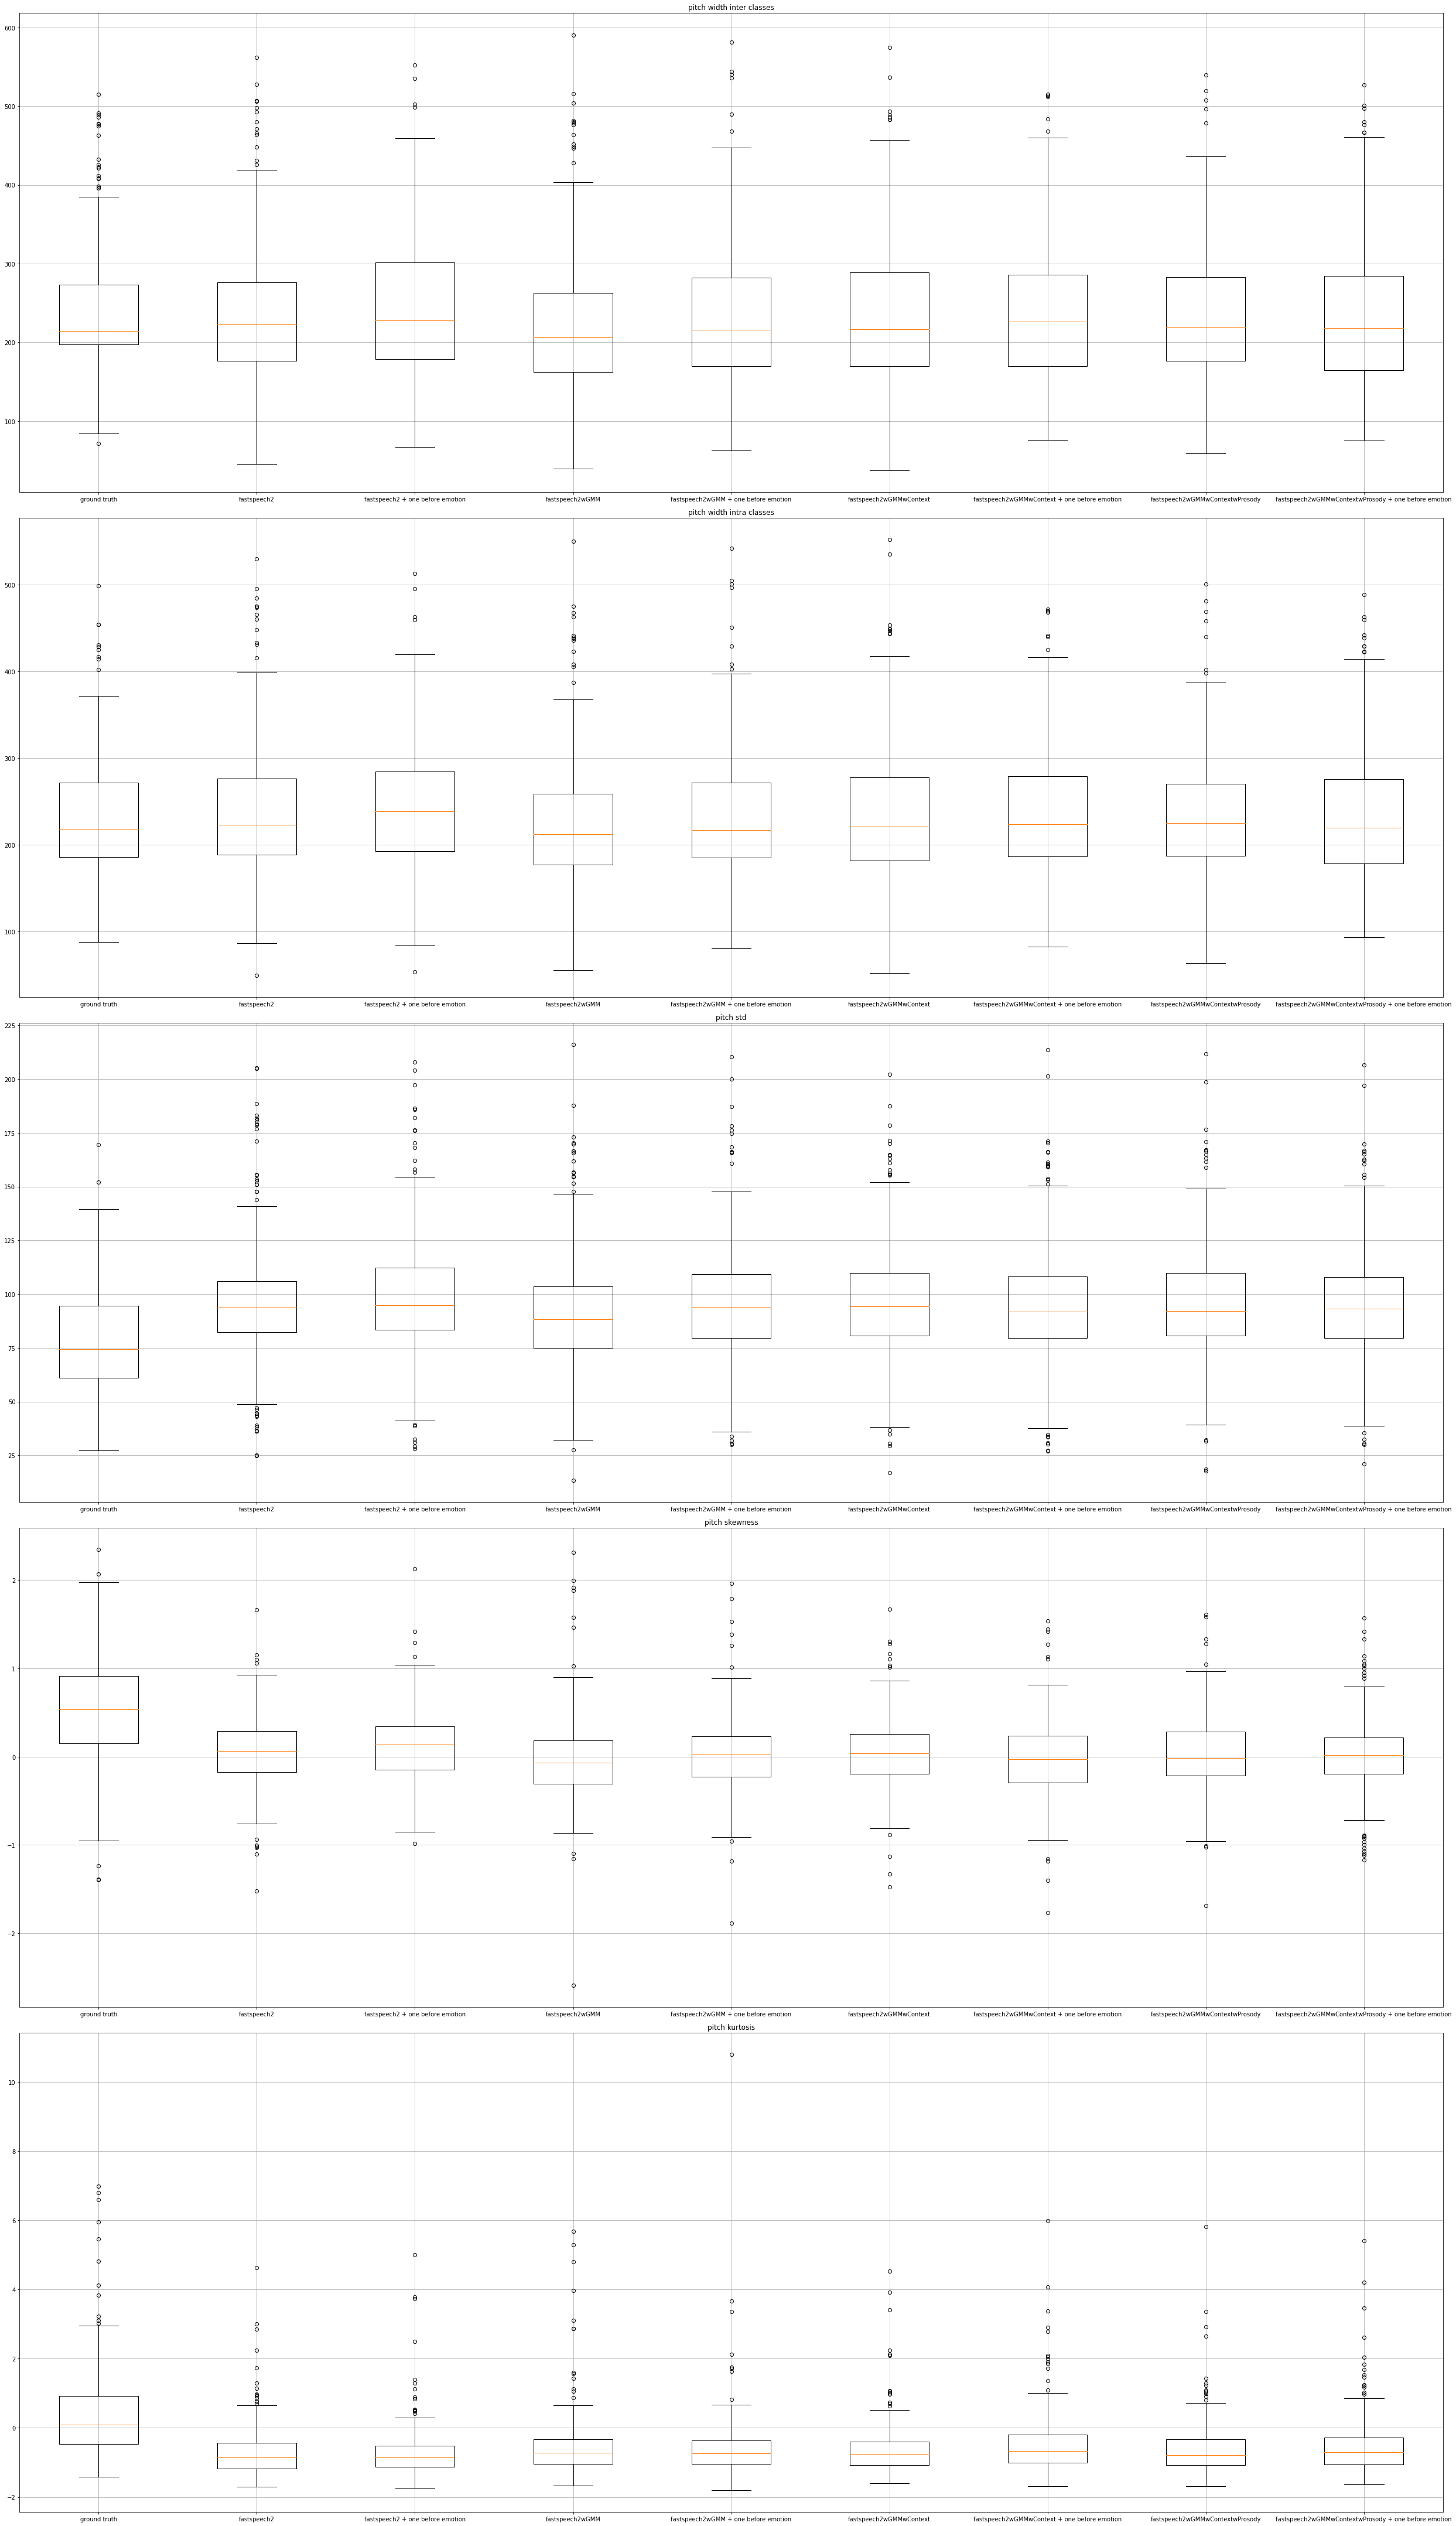

In [52]:
# box plot
fig, axes = plt.subplots(5, 1, figsize=(35, 60))

axes = axes.flatten()

titles = ["pitch width inter classes", "pitch width intra classes", "pitch std", "pitch skewness", "pitch kurtosis"]
for i, datas in enumerate([emotion_widthes_w_all_mean, emotion_widthes_w_class_mean, emotion_variances, emotion_skewnesses, emotion_kurtosises]):
    axes[i].set_title(titles[i])
    axes[i].set_xticklabels(labels)
    axes[i].boxplot(datas)
    axes[i].grid()
plt.tight_layout()
plt.show()

## 実行(発話全体の統計量)

In [53]:
# 感情幅と, pitch分散について計算を行う.
# 感情幅の定義は以下の通り
# max(pitchの最大値 - 全発話のpitch平均値,  abs(pitchの最小値 - 全発話のpitch平均値))
# ただし、pitch平均値はクラス内のものとクラス無視の両方を用いてみる.

# 最終的にplotするdataたち
# 感情毎
all_data_pitches = {k: [] for k in emotion_names}

# まずは, pitchを計算していく.
for base_path in voice_base_pathes:
    tmp_pitches = {k: [] for k in emotion_names}
    
    with ProcessPoolExecutor(10) as executor:
        futures = [
            executor.submit(
                get_pitch_emo,
                wav_path,
            )
            for wav_path in Path(base_path).glob("*.wav")
        ]
    for future in tqdm(futures):
        pitch, emo = future.result()
        tmp_pitches[emo] += list(pitch)

    for key in emotion_names:
        all_data_pitches[key].append(tmp_pitches[key])

100%|██████████| 211/211 [00:00<00:00, 71067.06it/s]


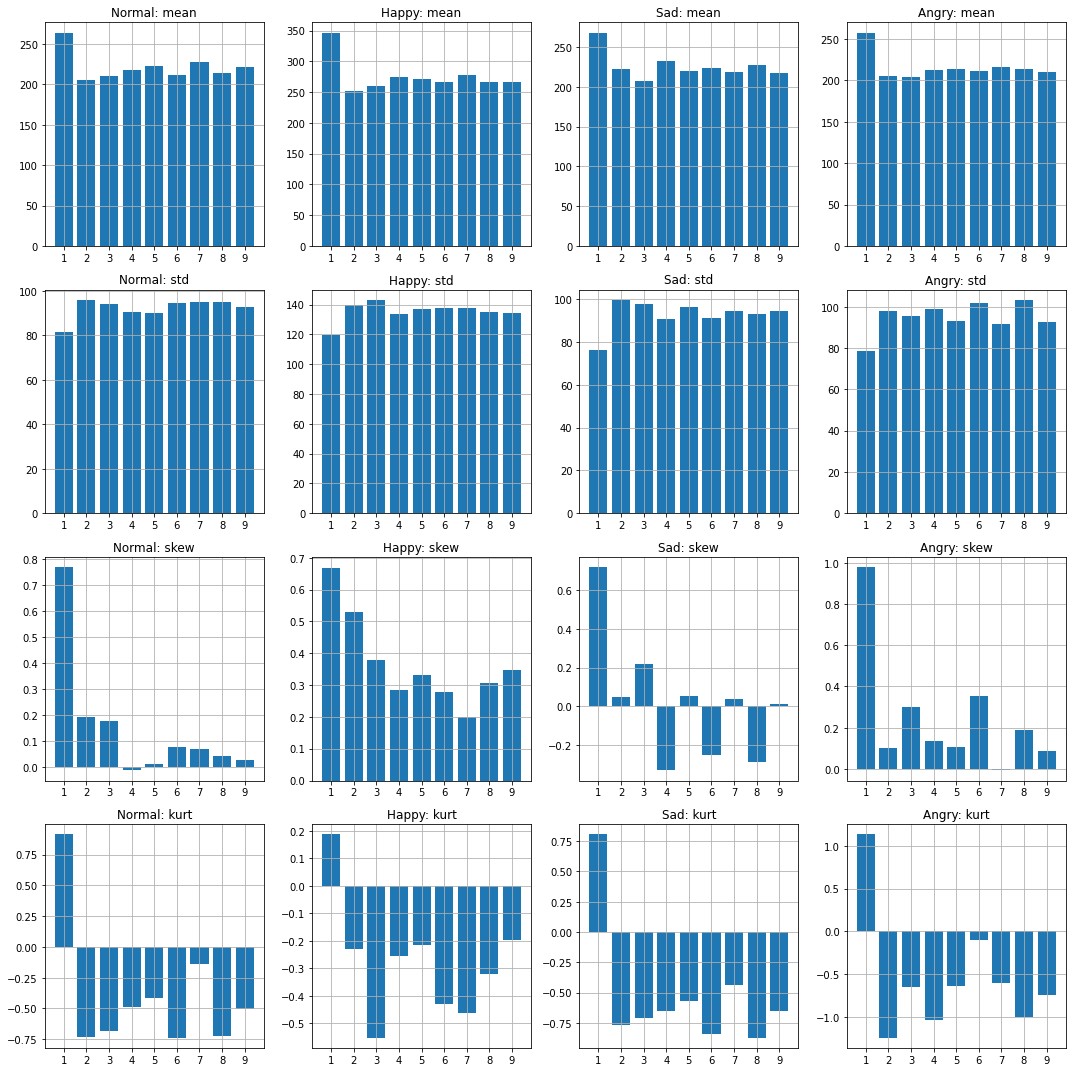

ID: 0, label: ground truth
ID: 1, label: fastspeech2
ID: 2, label: fastspeech2 + one before emotion
ID: 3, label: fastspeech2wGMM
ID: 4, label: fastspeech2wGMM + one before emotion
ID: 5, label: fastspeech2wGMMwContext
ID: 6, label: fastspeech2wGMMwContext + one before emotion
ID: 7, label: fastspeech2wGMMwContextwProsody
ID: 8, label: fastspeech2wGMMwContextwProsody + one before emotion


In [54]:
# 各種統計量

# 計算
stats_name = ["mean", "std", "skew", "kurt"]
stats_data = {k: {k_: [] for k_ in stats_name} for k in emotion_names}

for emo in emotion_names:
    for data_ in all_data_pitches[emo]:
        for key in stats_name:
            if key == "mean":
                stats_data[emo][key].append(np.mean(data_))
            elif key == "std":
                stats_data[emo][key].append(np.std(data_))
            elif key == "skew":
                stats_data[emo][key].append(stats.skew(data_))
            elif key == "kurt":
                stats_data[emo][key].append(stats.kurtosis(data_))

# 図示
fig, axes = plt.subplots(len(emotion_names), len(stats_name), figsize=(15, 15))

axes = axes.flatten()

for i, emo in enumerate(emotion_names):
    for j, key in enumerate(stats_name):
        axes[i+j*len(emotion_names)].set_title(f"{emo}: {key}")
        axes[i+j*len(emotion_names)].bar(np.arange(1, 1+len(labels)), stats_data[emo][key])
        axes[i+j*len(emotion_names)].set_xticks(np.arange(1, 1+len(labels)))
        axes[i+j*len(emotion_names)].grid()
plt.tight_layout()
plt.show()

for i, label in enumerate(labels):
    print(f"ID: {i}, label: {label}")

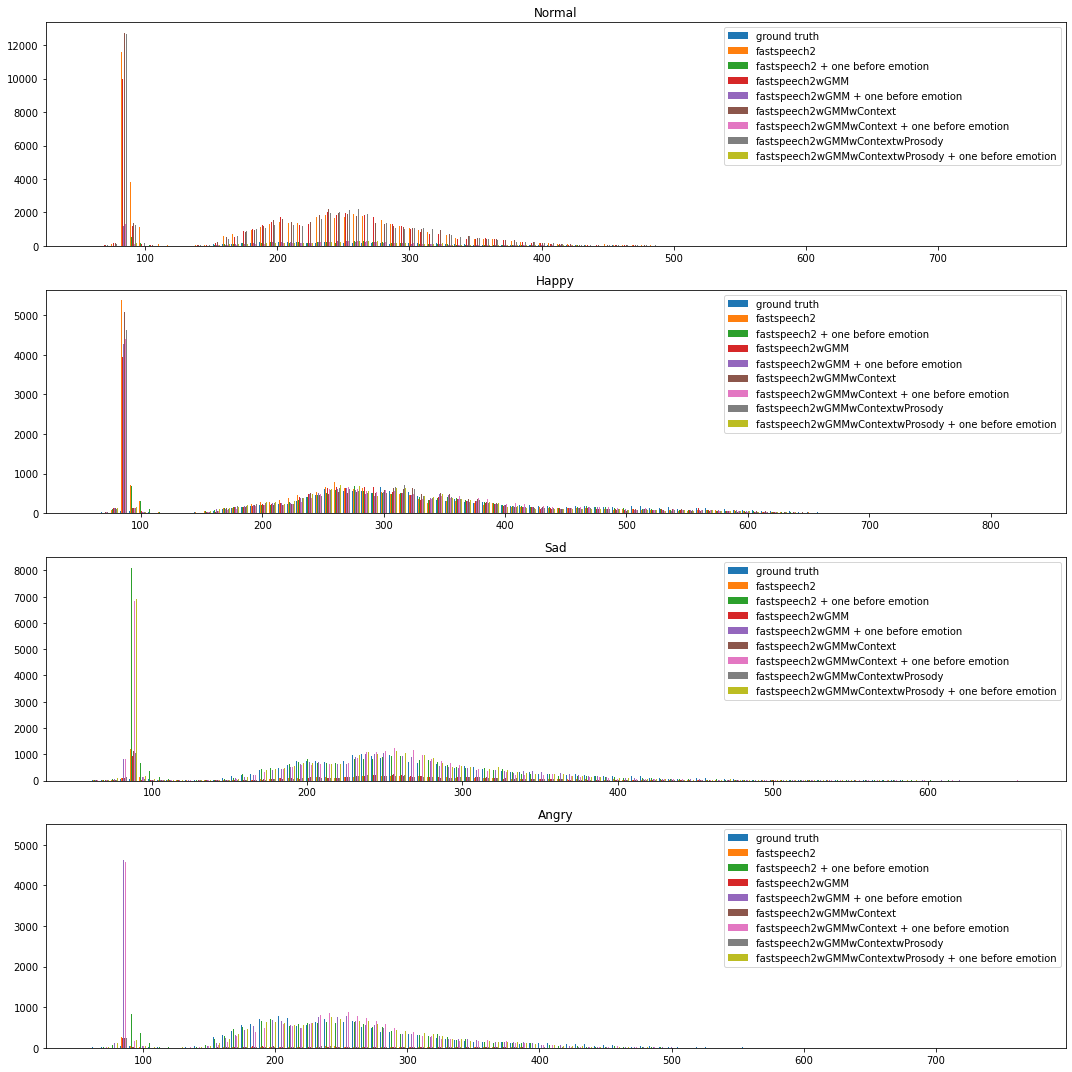

In [55]:
# hist plot(感情毎)
fig, axes = plt.subplots(4, 1, figsize=(15, 15))

axes = axes.flatten()

for i, emo in enumerate(emotion_names):
    axes[i].set_title(emo)
    axes[i].hist(all_data_pitches[emo], bins=100, label=labels)
    axes[i].legend()
plt.tight_layout()
plt.show()